In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%reload_ext autoreload

import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import repackage
repackage.up()

from modelo_perceptron import *
from modelo_lstm import *
from fluxdataset import *
from utils import *

In [2]:
epochs = 3
learning_rate = 0.001
alpha = 0.5
beta = 0.5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
PATH = "../datos/"
TRAIN_FILE = "exoTrain.csv"

In [4]:
df_train = pd.read_csv(f'{PATH}{TRAIN_FILE}', low_memory=False)
df_train['LABEL'] = df_train['LABEL'].add(-1)
df_train.iloc[:,1:] = reduce_upper_outliers(df_train.iloc[:,1:])
df_train.iloc[:,1:] = df_train.iloc[:,1:].apply(gaussian_filter, substract = True, axis = 1)
df_train.iloc[:,1:] = df_train.iloc[:,1:].apply(z_score_normalizing, axis = 1)

In [5]:
validation_proportion = 0.2
df_train, df_validation = split_train_df(df_train, validation_proportion)

In [6]:
model_name = os.getcwd() + "\\saved_models\\lstm_sgd_cross"
modelo = ModeloLSTM().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(modelo.parameters(), lr = learning_rate)

In [7]:
resultado = train_lstm(modelo, model_name, criterion, optimizer, epochs, alpha, beta, df_train, df_validation, device)

using device cuda
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1010		0
Positivos	7		0

Acierto: 0.9931170344352722 Sensibilidad: 0.0 Especificidad: 1.0 Score: 0.4965585172176361
New model saved
Score 0.4965585172176361 at epoch 0
Epoch: 0 Train loss 0.2745327469098773 Validation loss 0.11641149967908859
Score 0.4965585172176361 at epoch 1
Epoch: 1 Train loss 0.10278965811764579 Validation loss 0.06864357739686966
Score 0.4965585172176361 at epoch 2
Epoch: 2 Train loss 0.0722428830308469 Validation loss 0.05437731370329857
Best score 0.4965585172176361
execution time 114.4606023


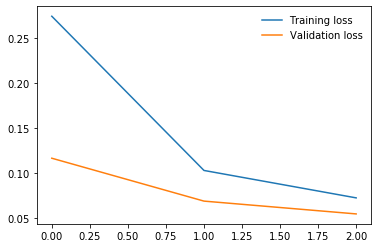

In [8]:
resultado.plot_losses()

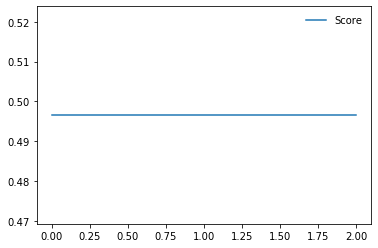

In [9]:
resultado.plot_scores()

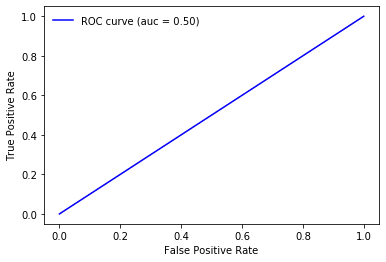

In [10]:
resultado.plot_roc()